### 需求：股票分析
- 使用tushare包获取某股票的历史行情数据。
- 输出该股票所有收盘比开盘上涨3%以上的日期。
- 输出该股票所有开盘比前日收盘跌幅超过2%的日期。
- 假如我从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？

- tushare财经数据接口包
    - pip install tushare

In [69]:
import tushare as ts
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

In [70]:
# 获取某只股票的历史行情数据
# code:字符串形式的股票代码
df = ts.get_k_data(code='600519',start='2000-01-01')
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
0,2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
1,2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2,2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
3,2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
4,2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519
...,...,...,...,...,...,...,...
5671,2025-05-08,1553.000,1578.190,1592.780,1549.830,33481.00,600519
5672,2025-05-09,1578.990,1591.180,1597.450,1575.050,23672.00,600519
5673,2025-05-12,1598.000,1604.500,1618.930,1596.610,24735.00,600519
5674,2025-05-13,1608.920,1590.300,1608.920,1585.110,21258.00,600519


In [71]:
# 将互联网上获取的股票数据存储到本地
# 调用to_xxx方法将df中的数据写入到本地进行存储
df.to_csv('./maotai.csv')

In [72]:
# 将本地存储的数据读入到df
df = pd.read_csv('./maotai.csv')
df.head()

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
1,1,2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2,2,2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
3,3,2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
4,4,2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519


In [73]:
# 删除df中指定的一列
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
# 查看每一列的数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5676 non-null   object 
 1   open    5676 non-null   float64
 2   close   5676 non-null   float64
 3   high    5676 non-null   float64
 4   low     5676 non-null   float64
 5   volume  5676 non-null   float64
 6   code    5676 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 310.5+ KB


In [74]:
# 将date列转为时间序列类型
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5676 non-null   datetime64[ns]
 1   open    5676 non-null   float64       
 2   close   5676 non-null   float64       
 3   high    5676 non-null   float64       
 4   low     5676 non-null   float64       
 5   volume  5676 non-null   float64       
 6   code    5676 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 310.5 KB


In [75]:
# 将date列作为源数据的行索引
df.set_index('date',inplace=True)
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519


In [76]:
# 输出该股票所有收盘比开盘上涨3%以上的日期
# 伪代码：（收盘-开盘）/开盘 > 0.03
(df['open'] - df['close']) / df['open'] > 0.03

# 在分析的过程中如果产生了boolean值则下一步马上将布尔值作为源数据的行索引
# 如果布尔值作为df的行索引，则可以取出true对应的行数据，忽略false对应的行数据
df.loc[(df['open'] - df['close']) / df['open'] > 0.03]          # 获取了True对应的行数据（满足需求的行数据）
df.loc[(df['open'] - df['close']) / df['open'] > 0.03].index    # df的行数据

DatetimeIndex(['2006-12-18', '2007-01-18', '2007-06-11', '2007-06-14',
               '2007-08-03', '2007-08-20', '2007-08-22', '2007-08-31',
               '2007-09-26', '2007-10-09',
               ...
               '2022-12-20', '2023-04-12', '2023-08-28', '2023-10-19',
               '2023-11-01', '2024-01-17', '2024-09-12', '2024-10-08',
               '2024-10-09', '2024-11-08'],
              dtype='datetime64[ns]', name='date', length=544, freq=None)

In [77]:
# 输出该股票所有开盘比前日收盘跌幅超过2%的日期
# 伪代码：(开盘-前日收盘)/前日收盘 < -0.02
(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02
# 将布尔值作为源数据的行索引取出True对应的行数据
df.loc[(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02]

df.loc[(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02].index

DatetimeIndex(['2006-05-25', '2007-03-01', '2007-06-01', '2007-08-09',
               '2007-10-23', '2007-11-26', '2007-12-11', '2007-12-19',
               '2007-12-20', '2007-12-24',
               ...
               '2022-03-14', '2022-03-15', '2022-03-28', '2022-10-13',
               '2022-10-24', '2022-11-03', '2022-11-28', '2023-02-06',
               '2024-06-24', '2025-04-07'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

- 需求：假如我从2018年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？
- 分析：
    - 时间节点：2018-2020
    - 一手股票：100股票
    - 买：
        - 一个完整的年需要买入1200支股票
    - 卖：
        - 一个完整的年需要卖出1200支股票
    - 买卖股票的单价：
        - 开盘价

In [78]:
new_df = df['2018-01':'2025-02']
new_df

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,494.784,498.634,504.944,484.674,49612.0,600519
2018-01-03,496.284,510.644,516.184,494.524,52019.0,600519
2018-01-04,516.184,531.854,538.284,514.114,72205.0,600519
2018-01-05,535.784,533.144,540.814,523.004,39989.0,600519
2018-01-08,529.804,546.914,551.284,529.804,52204.0,600519
...,...,...,...,...,...,...
2025-02-24,1488.000,1479.070,1499.520,1474.000,34744.0,600519
2025-02-25,1470.010,1454.000,1473.390,1452.000,28387.0,600519
2025-02-26,1455.450,1460.010,1464.960,1445.000,26366.0,600519


In [79]:
new_df.head(2)

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,494.784,498.634,504.944,484.674,49612.0,600519
2018-01-03,496.284,510.644,516.184,494.524,52019.0,600519


In [80]:
# 买股票：找每个月的第一个交易日对应的行数据（捕获到开盘价）==》每月的第一行数据
# 根据月份从原始数据中提取指定的数据
# 每月第一个交易日对应的行数据
df_monthly = new_df.resample('M').first() # 数据的重新取样
df_monthly

,open,close,high,low,volume,code
date,,,,,,
2018-01-31,494.784,498.634,504.944,484.674,49612.0,600519
2018-02-28,561.784,552.514,562.084,547.704,50582.0,600519
2018-03-31,522.784,536.754,541.634,518.554,44794.0,600519
2018-04-30,474.784,474.844,485.784,468.894,32039.0,600519
2018-05-31,454.784,462.614,463.774,439.844,70259.0,600519
...,...,...,...,...,...,...
2024-10-31,1886.118,1699.118,1886.118,1656.298,194709.0,600519
2024-11-30,1497.118,1509.868,1521.248,1496.918,32284.0,600519
2024-12-31,1502.118,1501.118,1506.108,1491.218,26820.0,600519


In [81]:
# 买入股票花费的总金额
cost = df_monthly['open'].sum()*100
cost

11399378.400000002

In [82]:
# 卖出股票到手的钱
# 特殊情况：2025年买入的股票卖不出去
new_df.resample('A').last()
# 将2020年最后一行切出去
df_yearly = new_df.resample('A').last()[:-1]
df_yearly

,open,close,high,low,volume,code
date,,,,,,
2018-12-31,369.083,395.793,402.183,365.783,63678.0,600519
2019-12-31,1003.322,1003.322,1008.322,996.832,22588.0,600519
2020-12-31,1778.347,1835.347,1836.327,1776.347,38860.0,600519
2021-12-31,1926.640,1906.640,1929.620,1884.640,29665.0,600519
2022-12-31,1636.225,1627.225,1653.215,1627.225,25333.0,600519
2023-12-31,1665.242,1671.242,1694.822,1665.242,27539.0,600519
2024-12-31,1525.400,1524.000,1545.000,1522.010,39354.0,600519


In [83]:
# 卖出股票到手的钱
resv = df_yearly['open'].sum()*1200
resv

11885110.8

In [84]:
# 最后手中剩余的股票需要估量其价值计算到总收益中
# 使用昨天的收盘价作为剩余股票的单价
last_monry = 200*new_df['close'][-1]
# 计算总收益
resv+last_monry-cost

785890.3999999985

### 需求：双均线策略制定

- 使用tushare包获取某股票的历史行情数据

In [85]:
df = pd.read_csv('./maotai.csv').drop(labels='Unnamed: 0',axis=1)
df

,date,open,close,high,low,volume,code
0,2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
1,2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2,2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
3,2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
4,2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519
...,...,...,...,...,...,...,...
5671,2025-05-08,1553.000,1578.190,1592.780,1549.830,33481.00,600519
5672,2025-05-09,1578.990,1591.180,1597.450,1575.050,23672.00,600519
5673,2025-05-12,1598.000,1604.500,1618.930,1596.610,24735.00,600519
5674,2025-05-13,1608.920,1590.300,1608.920,1585.110,21258.00,600519


In [86]:
# 将date列转为时间序列且将其作为源数据的行索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-234.719,-234.534,-234.138,-235.014,406318.00,600519
2001-08-28,-234.634,-234.301,-234.276,-234.701,129647.79,600519
2001-08-29,-234.280,-234.387,-234.276,-234.436,53252.75,600519
2001-08-30,-234.404,-234.259,-234.186,-234.454,48013.06,600519
2001-08-31,-234.250,-234.275,-234.166,-234.312,23231.48,600519


- 计算该股票历史数据的5日均线和30日均线
    - 什么是均线？
        - 对于每一个交易日，都可以计算出前N天的移动平均值，然后把这些移动平均值连起来，成为一条线，就叫做N日移动平均线。移动平均线常用线有5天、10天、30天、60天、120天和240天的指标。
       - 5天和10天的是短线操作的参照指标，称做日均线指标；
       - 30天和60天的是中期均线指标，称做季均线指标；
       - 120天和240天的是长期均线指标，称做年均线指标。
    - 均线计算方法：MA=（C1+C2+C3+...+Cn)/N C:某日收盘价 N:移动平均周期（天数）

In [87]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()
ma5

date
2001-08-27          NaN
2001-08-28          NaN
2001-08-29          NaN
2001-08-30          NaN
2001-08-31    -234.3512
                ...    
2025-05-08    1554.8780
2025-05-09    1564.3140
2025-05-12    1575.8140
2025-05-13    1583.8340
2025-05-14    1599.8320
Name: close, Length: 5676, dtype: float64

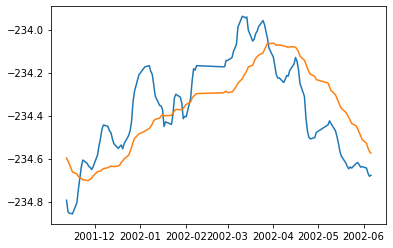

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ma5[50:180])
plt.plot(ma30[50:180])

- 分析输出所有金叉日期和死叉日期
    - 股票分析技术中的金叉和死叉，可以简单解释为：
        - 分析指标中的两根线，一根为短时间内的指标线，另一根为较长时间的指标线。
        - 如果短时间的指标线方向拐头向上，并且穿过了较长时间的指标线，这种状态叫“金叉”；
        - 如果短时间的指标线方向拐头向下，并且穿过了较长时间的指标线，这种状态叫“死叉”；
        - 一般情况下，出现金叉后，操作趋向买入；死叉则趋向卖出。当然，金叉和死叉只是分析指标之一，要和其他很多指标配合使用，才能增加操作的准确性。

In [89]:
ma5 = ma5[30:]
ma30 = ma30[30:]

In [90]:
s1 = ma5 < ma30
s2 = ma5 > ma30

In [91]:
df = df[30:]

In [92]:
death_ex = s1 & s2.shift(1)         # 判定死叉的条件
df.loc[death_ex]                    # 死叉对应的行数据
death_date = df.loc[death_ex].index

In [93]:
golden_ex = ~(s1 | s2.shift(1))       # 判定金叉的条件
golden_date = df.loc[golden_ex].index # 金叉的时间

- 如果我从假如我从2018年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何？
- 分析：
    - 买卖股票的单价使用开盘价
    - 买卖股票的时机
    - 最终手里会有剩余的股票没有卖出去
        - 会有。如果最后一天为金叉，则买入股票。估量剩余股票的价值计算到总收益。
            - 剩余股票的单价就是用最后一天的收盘价。

In [94]:
s1 = Series(data=1,index=golden_date)   # 1作为金叉的标识
s2 = Series(data=0,index=death_date)    # 0作为死叉的标识

s = s1.append(s2)
s = s.sort_index()                      # 存储的是金叉和死叉对应的时间

In [95]:
s = s['2018':'2024']       #存储的是金叉和死叉对应的时间

In [96]:
first_monry = 100000    # 本金，不变
money = first_monry     # 可变的，买股票话的钱和卖股票收入的钱都从该变量中进行操作
hold = 0                # 持有股票的数量（股数：100股=1手）

for i in range(0,len(s)): # i表示的s这个Series中的隐式索引
    # i = 0(死叉：卖) = 1（金叉：买）
    if s[i] == 1:# 金叉的时间
        # 基于100000的本金尽可能多的去买入股票
        # 获取股票的单价（金叉时间对应的行数据中的开盘价）
        time = s.index[i] # 金叉的时间
        p = df.loc[time]['open'] # 股票的单价
        hand_count = money // (p*100) # 使用100000最多买入多少手股票
        hold = hand_count * 100 
        
        money -= (hold * p) # 将买股票话的钱从money中减去
    else:
        # 将买入的股票卖出去
        # 找出卖出股票的单价
        death_time = s.index[i]
        p_death = df.loc[death_time]['open'] # 卖股票的单价
        money += (p_death * hold) # 卖出的股票收入加入到money
        hold = 0

# 如何判定最后一天为金叉还是死叉
last_monry = hold * df['close'][-1] # 剩余股票的价值
# 总收益
money + last_monry - first_monry

229353.40000000002

- 聚宽
- BitQuant
- 米筐
- 天勤